# Imports

In [46]:
import pandas as pd
import random
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
from simpletransformers.classification import ClassificationModel

# Task 3 - Classification by fine-tuning BERT

## Build Model

In [ ]:
!pip install simpletransformers

In [13]:
BERT = ClassificationModel("bert", "bert-base-cased")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

## Train Model

In [12]:
train_path = "olid-train.csv"
train_file = pd.read_csv(train_path)
train_file = train_file.drop("id", axis=1)
print(train_file)



                                                    text  labels
0      @USER She should ask a few native Americans wh...       1
1      @USER @USER Go home you’re drunk!!! @USER #MAG...       1
2      Amazon is investigating Chinese employees who ...       0
3      @USER Someone should'veTaken" this piece of sh...       1
4      @USER @USER Obama wanted liberals &amp; illega...       0
...                                                  ...     ...
13235  @USER Sometimes I get strong vibes from people...       1
13236  Benidorm ✅  Creamfields ✅  Maga ✅   Not too sh...       0
13237  @USER And why report this garbage.  We don't g...       1
13238                                        @USER Pussy       1
13239  #Spanishrevenge vs. #justice #HumanRights and ...       0

[13240 rows x 2 columns]


In [14]:
BERT.train_model(train_df=train_file)

  0%|          | 0/13240 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1655 [00:00<?, ?it/s]

(1655, 0.5165387698170641)

## Test Model

In [16]:
test_path = "olid-test.csv"
test_file = pd.read_csv(test_path)
test_file = test_file.drop(["id", "labels"], axis=1)
test_file = test_file["text"].tolist()
print(test_file)



['#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon \u2066@USER URL', '#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.', '#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER    @USER @USER @USER @USER   #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER  First, it reduces the ca URL', '#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL', '#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL', '. . . What the fuck did he do this time?', '#RAP is a form of ART! Used to express yourself freely. It does not gv the green light or excuse the behavior of acting like an anim

In [17]:
predictions, raw_outputs = BERT.predict(to_predict=test_file)

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

## Evaluate Model

### Metrics

In [53]:
test = pd.read_csv(test_path)
gold = test["labels"].tolist()

from sklearn.metrics import precision_recall_fscore_support

zero_positive = precision_recall_fscore_support(gold, predictions, average='binary', pos_label=0)
one_positive = precision_recall_fscore_support(gold, predictions, average='binary', pos_label=1)
macro = precision_recall_fscore_support(gold, predictions, average="macro")
weighted = precision_recall_fscore_support(gold, predictions, average="weighted")

print("\033[1mTASK 3 - FINE TUNING BERT (2.5 points):\n---------------------------------------\033[0m\n")
print("\033[1mResults for 0 as positive class:\n--------------------------------\033[0m")
print("Precision:", zero_positive[0], "\nRecall:", zero_positive[1], "\nF1:", zero_positive[2])

print("\n\033[1mResults for 1 as positive class:\n--------------------------------\033[0m")
print("Precision:", one_positive[0], "\nRecall:", one_positive[1], "\nF1:", one_positive[2])

print("\n\033[1mResults for macro-average:\n--------------------------------\033[0m")
print("Precision:", macro[0], "\nRecall:", macro[1], "\nF1:", macro[2])

print("\n\033[1mResults for weighted-average:\n--------------------------------\033[0m")
print("Precision:", weighted[0], "\nRecall:", weighted[1], "\nF1:", weighted[2])

TASK 3 - FINE TUNING BERT (2.5 points):
---------------------------------------

Results for 0 as positive class:
--------------------------------
Precision: 0.8691019786910198 
Recall: 0.9209677419354839 
F1: 0.894283476898982

Results for 1 as positive class:
--------------------------------
Precision: 0.7586206896551724 
Recall: 0.6416666666666667 
F1: 0.6952595936794582

Results for macro-average:
--------------------------------
Precision: 0.813861334173096 
Recall: 0.7813172043010753 
F1: 0.7947715352892202

Results for weighted-average:
--------------------------------
Precision: 0.838269991053109 
Recall: 0.8430232558139535 
F1: 0.8387419280935334


### Confusion Matrix

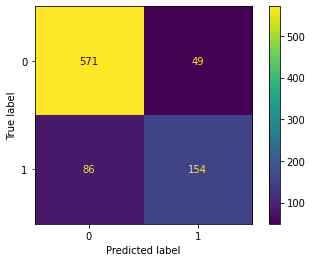

In [51]:
BERTRIX = confusion_matrix(gold, predictions)
BERTPLOT = ConfusionMatrixDisplay(confusion_matrix=BERTRIX)
BERTPLOT.plot()